In [3]:
!pip install opentsne
# !pip install -U scikit-learn

In [104]:
from sklearn import datasets
import json
from openTSNE import TSNE
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

embedding = TSNE().fit(x)

In [106]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

In [101]:
# TODO add the Target Information into  your json file
with open('data.json', 'w') as f:
    json.dump(np.array(embedding).tolist(), f)

C:\Users\Nurlan\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(30.94391375000002, 0.5, 'Comp 2')

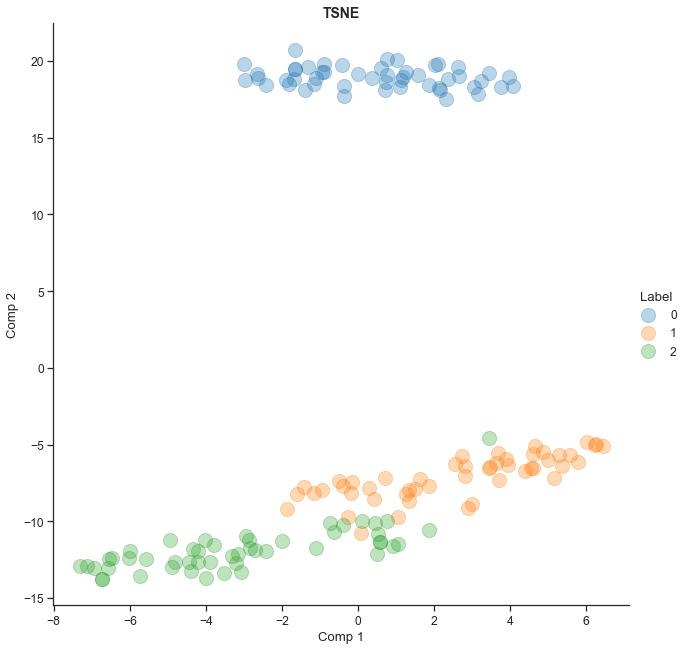

In [67]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("TSNE", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [68]:
data.to_csv('data_tsne.csv', index=False)

In [19]:
!pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=091c6317f23c2e611be0e48bae1f5963856b87f446344559f53d6221fd36048e
  Stored in directory: c:\users\nurlan\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55511 sha256=ac47b71ef11e40daa678d2f3c573750f4136540a13f2d3be5dc4aa7b5befaaec
  Stored in directory: c:\users\nurlan\appdata\local\pip\cache\wheels\b9\89\cc\59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [30]:
!pip uninstall umap

^C


In [31]:
!pip install umap-learn

In [108]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

In [109]:
iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

In [110]:
reducer = umap.UMAP(n_components=2, init='random', random_state=0)

In [111]:
scaled_df = StandardScaler().fit_transform(x)

In [112]:
embedding = reducer.fit_transform(scaled_df)

In [113]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

C:\Users\Nurlan\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(30.390736666666676, 0.5, 'Comp 2')

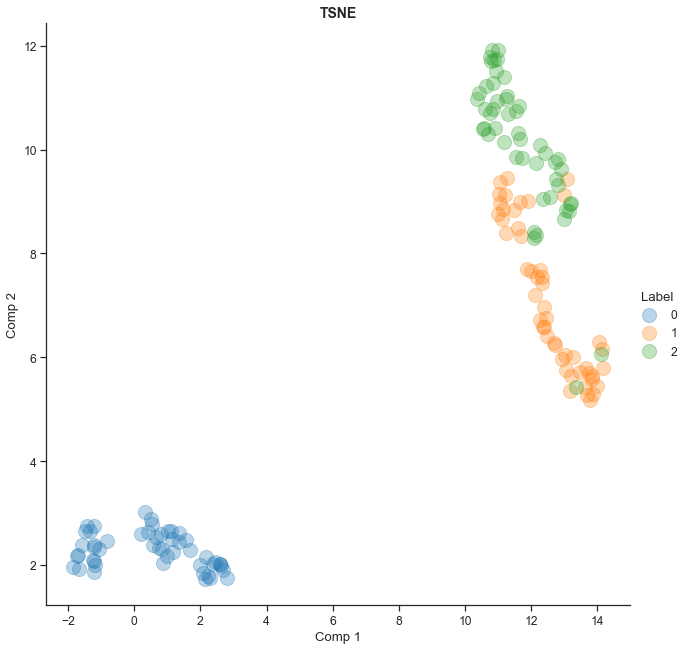

In [114]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("TSNE", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

In [116]:
data.head()

,Comp1,Comp2,Label
0,1.338561,2.444917,0
1,-1.221306,1.861045,0
2,-1.211262,2.741576,0
3,-1.569500,2.393807,0
4,1.682466,2.284967,0


In [58]:
# TODO add the Target Information into  your json file
with open('data_umap.json', 'w') as f:
    json.dump(np.array(embedding).tolist(), f)

In [59]:
data.dtypes

Comp1    float32
Comp2    float32
Label      int32
dtype: object

In [83]:
data.to_csv('data_umap.csv', index=False)

In [91]:
data.head()

,Comp1,Comp2,Label
0,1.121122,18.778171,0
1,-1.305767,19.628710,0
2,-1.674343,18.864699,0
3,-1.879695,18.740325,0
4,1.107968,18.329959,0


In [92]:
data['Comp1'] = data['Comp1'].apply(lambda x: round(x,2))
data['Comp2'] = data['Comp2'].apply(lambda x: round(x,2))

In [93]:
data.to_csv('data_umap.csv', index=False)

In [107]:
data.head()

,Comp1,Comp2,Label
0,1.121122,18.778171,0
1,-1.305767,19.628710,0
2,-1.674343,18.864699,0
3,-1.879695,18.740325,0
4,1.107968,18.329959,0


In [117]:
out = data.to_json(orient='records')
with open('umap.json', 'w') as f:
    f.write(out)